## Linear Regression  
Linear regression is a linear approach to modelling the relationship between a dependent variable and one or more independent variables. In the case of one independent variable it is called simple linear regression. For more than one independent variable, the process is called mulitple or just linear regression. 


Let **X** be the independent variable and **Y** be the dependent variable. We will define a linear relationship between these two variables as follows:  

\\[ Y =  mX + c \\]  

![mxplusc](http://www.nabla.hr/SlopeInterceptLineEqu.gif)

This is the equation for a line that you studied in high school. **m** is the slope of the line and **c** is the y intercept. Today we will use this equation to train our model with a given dataset and predict the value of **Y** for any given value of **X**.  
  
Our challenege today is to determine the value of **m** and **c**, that gives the minimum error for the given dataset. We will be doing this by using the **Least Squares** method.  

## Finding the Error  
So to minimize the error we need a way to calculate the error in the first place. A **loss function** in machine learning is simply a measure of how different the predicted value is from the actual value.  
Today we will be using the **Quadratic Loss Function** to calculate the loss or error in our model. It can be defined as: 
  
\\[ L(x) = \sum_{i=1}^n (y_i - p_i)^2\\]  
  
We are squaring it because, for the points below the regression line **y - p** will be negative and we don't want negative values in our total error.  

## Least Squares method  
Now that we have determined the loss function, the only thing left to do is minimize it. This is done by finding the partial derivative of **L**, equating it to 0 and then finding an expression for **m** and **c**. After we do the math, we are left with these equations:    
  
\\[m = \frac{\sum_{i=1}^n (x_i - \bar x)(y_i - \bar y)}{\sum_{i=1}^n (x_i - \bar x)^2}\\]  
  
\\[c = \bar y - m\bar x\\]  
  
Here $\bar x$ is the mean of all the values in the input **X** and $\bar y$ is the mean of all the values in the desired output **Y**. This is the Least Squares method. 
Now we will implement this in python and make predictions.  

# Linear Regression using Least Squares 
## Implementing the Model (without using any ML packages)

In [17]:
# Making imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (12.0, 9.0)

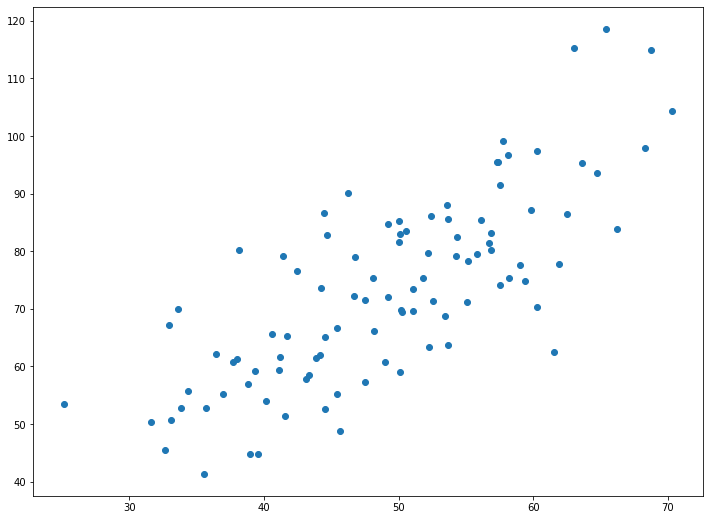

In [2]:
# Preprocessing Input data
data = pd.read_csv('./data/data.csv')
X = data.iloc[:, 0] # selects all the rows and column 0
Y = data.iloc[:, 1] # selects all the rows and column 1
plt.scatter(X, Y)
plt.show()

In [6]:
X[5:12]

5     52.211797
6     39.299567
7     48.105042
8     52.550014
9     45.419730
10    54.351635
11    44.164049
Name: 32.502345269453031, dtype: float64

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   32.502345269453031  99 non-null     float64
 1   31.70700584656992   99 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB


In [4]:
# Building the model
X_mean = np.mean(X)
Y_mean = np.mean(Y)

num = 0
den = 0
for i in range(len(X)):
    num += (X[i] - X_mean)*(Y[i] - Y_mean)
    den += (X[i] - X_mean)**2
m = num / den
c = Y_mean - m*X_mean

print (m, c)

1.2873573700109313 9.908606190326495


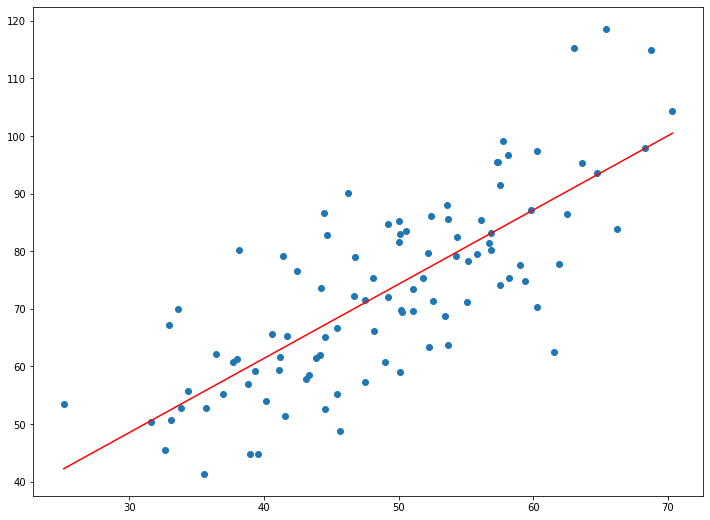

In [5]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y) # actual
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()


# Linear Regression using Gradient Descent  



## Loss function  
The loss is the error in our predicted of **m** and **c**. Our goal is to minimize this error to obtain the most accurance value of **m** and **c**.  
We will use the Mean Squared Error function to calculate the loss. There are three steps in this function:
1. Find the difference between the actual y and predicted y value(y = mx + c), for a given x.  
2. Square this difference.
3. Find the mean of the squares for every value in X.  
\\[ E = \frac{1}{n} \sum_{i=0}^n (y_i - \bar y_i)^2\\]  

Here $y_i$ is the actual value and $\bar y_i$ is the predicted value. Lets substitue the value of $\bar y_i$
\\[ E = \frac{1}{n} \sum_{i=0}^n (y_i - (mx_i + c))^2\\]
So we square the error and find the mean. hence the name Mean Squared Error.  
Now that we have defined the loss function, lets get into the interesting part - minimizing it and finding **m** and **c**

## The Gradient Descent Algorithm  
Gradient descent is an iterative optimization algorithm to find the minimum of a function. Here that function is our Loss Function.   

Imagine a valley and a person with no sense of direction who wants to get to the bottom of the valley. He goes down the slope and takes large steps when the slope is steep and small steps when the slope is less steep. He decides his next position based on his current position and stops when he gets to the bottom of the valley which was his goal.   
Let's try applying gradient descent to **m** and **c** and approach it step by step: 
1. Initially let m = 0 and c = 0. Let L be our learning rate. This controls how much the value of **m** changes with each step. L could be a small value like 0.0001 for good accuracy. 
2. Calculate the partial derivative of the loss function with respect to m, and plug in the current values of x, y, m and c in it to obtain the derivative value **D**.  
\\[ D_m = \frac{1}{n} \sum_{i=0}^n 2(y_i - (mx_i + c))(-x_i) \\]
\\[ D_m = \frac{-2}{n} \sum_{i=0}^n x_i(y_i - \bar y_i) \\]  
$D_m$ is the value of the partial derivative with respect to **m**. Similarly lets find the partial derivative with respect to **c**, $D_c$ :  
\\[ D_c = \frac{-2}{n} \sum_{i=0}^n (y_i - \bar y_i) \\]
3. Now we update the current value of **m** and **c** using the following equation: 
\\[ m = m - L \times D_m\\]  
\\[ c = c - L \times D_c\\]  
4. We repeat this process untill our loss function is a very small value or ideally 0 (which means 0 error or 100% accuracy). The value of **m** and **c** that we are left with now will be the optimum values.  
  
Now going back to our analogy, **m** can be considered the current position of the person. **D** is equivalent to the steepness of the slope and **L** can be the speed with which he moves. Now the new value of **m** that we calculate using the above equation will be his next positon, and $L \times D$ will be the size of the steps he will take. When the slope is more steep (**D** is more) he takes longer steps and when it is less steep (**D** is less), he takes smaller steps. Finally he arrives at the bottom of the valley which corresponds to our loss = 0.  
We repeat the same process above to find the value of **c** also. Now with the optimum value of **m** and **c** our model is ready to make predictions !  

## Implementing the Model  
Now let's convert everything above into code and see our model in action !

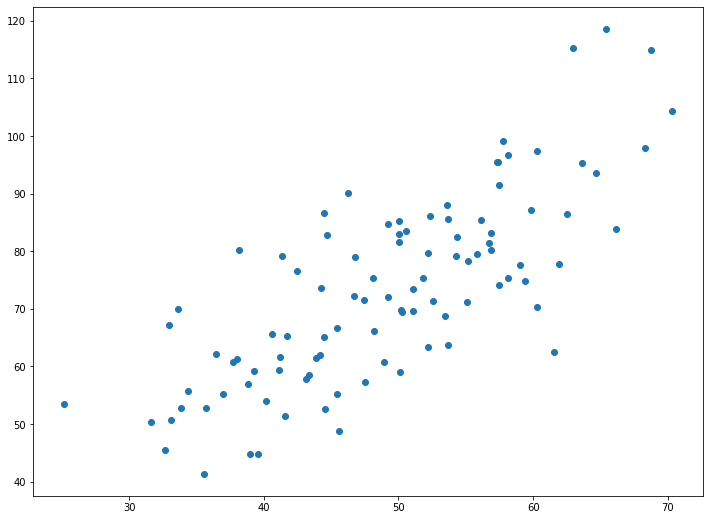

In [3]:
# Making the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

# Preprocessing Input data
data = pd.read_csv('./data/data.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

In [4]:
# Building the model
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

1.4796491688889395 0.10148121494753734


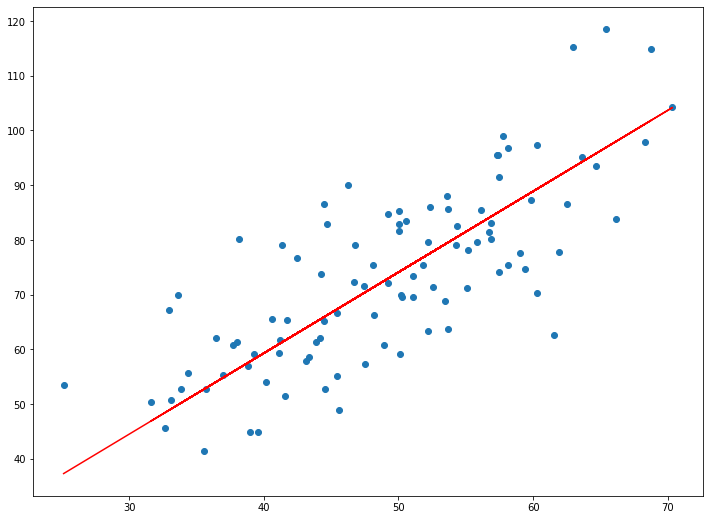

In [7]:
# Making predictions
Y_pred = m*X + c
# [min(X), max(X)] [min(Y_pred), max(Y_pred)]

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red') # predicted
plt.show()

# Linear Regression using sklearn Python Library


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

data = pd.read_csv('./data/data.csv')
X = data.iloc[:, 0].values.reshape(-1, 1) # values converts it into a numpy array
Y = data.iloc[:, 1].values.reshape(-1, 1) # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

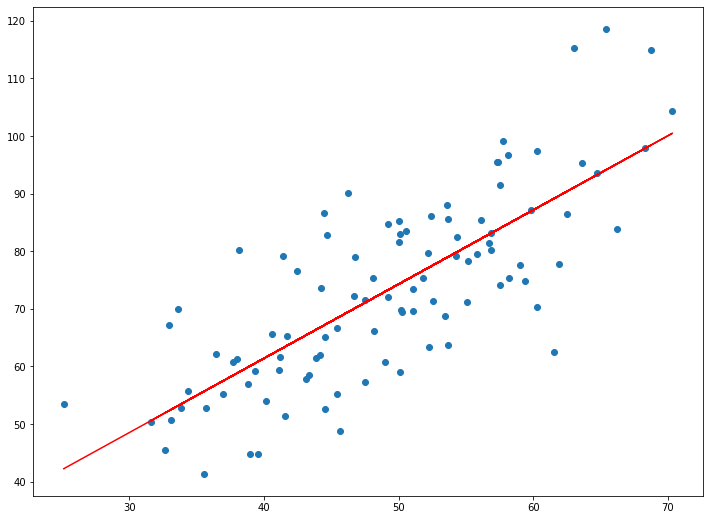

In [14]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

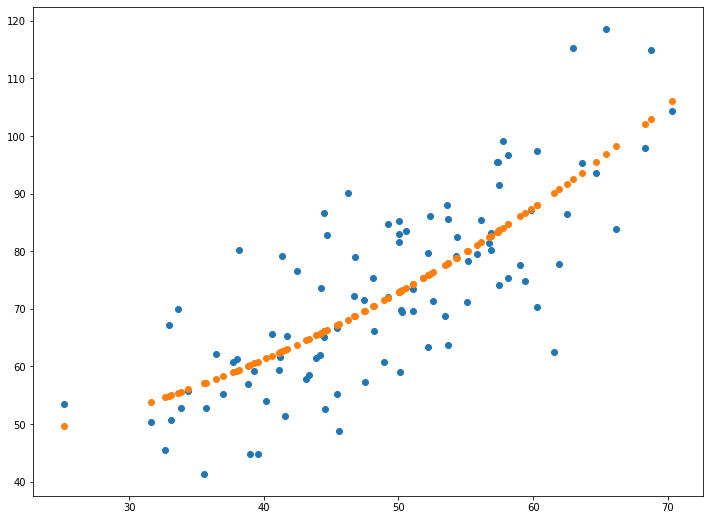

In [15]:
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree = 2)
X_poly = pr.fit_transform(X)
pr.fit(X_poly, Y)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, Y)
plt.scatter(X, Y)
plt.scatter(X, lin_reg.predict(pr.fit_transform(X)))
plt.show()

### IRIS Model

In [9]:
# Import Dataset from sklearn
from sklearn.datasets import load_iris
# Load Iris Data
iris = load_iris()

In [17]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [10]:
# Creating pd DataFrames
iris_df = pd.DataFrame(data= iris.data, columns= iris.feature_names)
target_df = pd.DataFrame(data= iris.target, columns= ['species'])


In [19]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
target_df

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [11]:
def converter(specie):
    if specie == 0:
        return 'setosa'
    elif specie == 1:
        return 'versicolor'
    else:
        return 'virginica'
target_df['species'] = target_df['species'].apply(converter)
# Concatenate the DataFrames
iris_df = pd.concat([iris_df, target_df], axis= 1)

In [22]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [23]:
target_df

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [24]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [25]:
iris_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


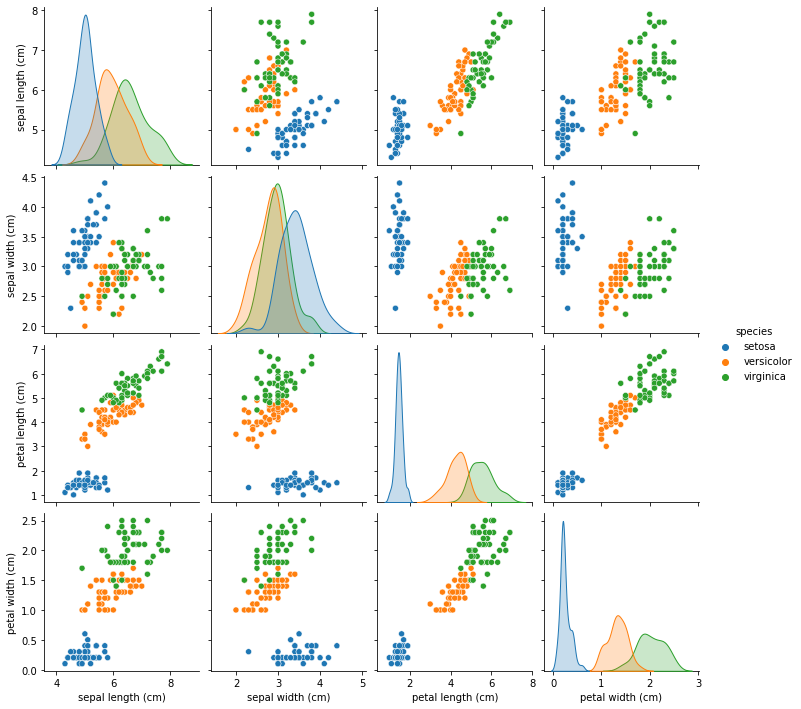

In [18]:
sns.pairplot(iris_df, hue= 'species')


### Problem Statement: Using Linear Regression Predict the sepal length (in cm) of the iris flowers

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Converting Objects to Numerical dtype
iris_df.drop('species', axis= 1, inplace= True)
target_df = pd.DataFrame(columns= ['species'], data= iris.target)
iris_df = pd.concat([iris_df, target_df], axis= 1)
# Variables
X= iris_df.drop(labels= 'sepal length (cm)', axis= 1)
y= iris_df['sepal length (cm)']

# Splitting the Dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 101)

# Instantiating LinearRegression() Model
lr = LinearRegression()

# Training/Fitting the Model
lr.fit(X_train, y_train)

# Making Predictions
lr.predict(X_test)
pred = lr.predict(X_test)

# Evaluating Model's Performance
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))
print(pred)

Mean Absolute Error: 0.2595570975563035
Mean Squared Error: 0.10174529564238954
Mean Root Squared Error: 0.3189753840696638
[5.46114587 5.07345452 4.9347765  6.99564965 6.54274665 5.98101314
 5.68344523 5.47200924 5.87249006 4.687635   6.2935498  5.53302753
 4.90789461 7.34015348 6.17439086 6.09386911 6.00159206 6.01550096
 4.73818534 6.6970219  5.49567769 5.21721782 6.03683228 6.24318298
 6.09386911 5.5452921  5.09735047 5.85437218 4.84437129 4.10007944
 6.64781317 5.60092772 6.64459972 5.7094508  6.47068148 6.18614616
 6.42031467 5.96401471 5.88658249 6.82494485 5.10127233 4.76091786
 4.97328977 6.47501437 6.19911914 4.51050332 6.78415406 5.98213258
 4.83046239 4.93319177]
